# The generalization of Schelling's model of segregation on Hypergraph

Given the hypergraph $H = (E, V)$, where $V = \{v_1, v_2, ..., v_{N}\}$ and $E = \{e_1, e_2, ..., e_{M}\} \text{, } e_{j} \subset V \text{ }$ for all $j$. Each node will be assigned one label $a_{i}$ (via function $F: V \rightarrow A$) in the label set $A = \{a_{1}, a_{2}, ...\}$ such that

$$\bigcup_{i=1}^{|A|}V_{i} \subset V \text{ where } V_{i} = \{v | v \in V \text{ and } F(v) = a_{i} \} \text{ and } V_{i} \cap V_{j} = \emptyset \text{, } \forall i, j$$ 

For the simplification, we just A is finite and there are some unlabeled vertices (i.e., $\sum_{i = 1}^{|A|} |V_{i}| < |V|$) and do not allow the one-vertex hyperedge (i.e., $|e_{j}| > 1$). 

In each iteration, the process of the Schelling's model has described below:

1. Select one labeled vertex randomly.
2. Calculate the neighborhood coefficient of this vertex via the formula:
    $$G(v) = \frac{1}{K_{v}}\sum_{j=1 \text{, } v \in e_{j}}^{|E|} \frac{|N_{j}(v)|}{|e_{j}| - 1} $$
    
    where,
    
\begin{align*}
    & N_{j}(v) = \{v' | v' \neq v \text{, } F(v') = F(v) \text{, and } v' \in e_{j} \} \\
    & K_{v} \text{ is the number of hyperedge that contains v}
\end{align*}
    
3. If $G(v) < \tau \text{ (} 0 \leq \tau \leq 1)$, assign randomly the label of the chosen vertex to one unlabeled vertex, and the chosen vertex in step 1 will become unlabeled.
4. Repeat step 1 to 3 until every node has $G(v) \geq \tau$ or after a fixed number of iteration.

In [1]:
from HyperRD.Hrandom import *
from HyperRD.Halgorithm import *
from HyperRD.Hgraph import *
from HyperRD.Hdynamic import *
from HyperRD.Htranslate import *
import matplotlib.pyplot as plt

 No module named 'igraph'. If you need to use hypernetx.algorithms.hypergraph_modularity, please install additional packages by running the following command: pip install .['all']


In [332]:
class Schelling_Model(object):
    # init function to declare class variables
    def __init__(self, n_red, n_blue, n_yellow, graph):
        """Random system initialisation.
        RED    =  0
        BLUE   =  1
        YELLOW =  2
        EMPTY  = -1
        """
        array = np.zeros(len(graph.vertices))
        array[n_red: n_red + n_blue] = 1
        array[n_red + n_blue: n_red + n_blue + n_yellow] = 2
        array[n_red + n_blue + n_yellow:] = -1
        self.graph = graph
        self.array = np.array(array)
        np.random.shuffle(self.array)
    
    def running(self, iteration, tol):
        '''Running the model'''
        total = len(self.array)
        for i in range(iteration):
            citizen = np.where(self.array >= 0)[0]
            start = np.random.choice(citizen, 1, replace = False)[0]
            if self.neighbor_coefficient(start) < tol:
                empty = np.where(self.array < 0)[0]
                end = np.random.choice(empty, 1)[0]
                if self.neighbor_coefficient(end) != 2:
                    self.array[start], self.array[end] = self.array[end], self.array[start]
    
    def neighbor_coefficient(self, start):
        '''calculate the neighbor coefficient'''
        edges = self.graph.edges
        coeff = np.array([])
        for edge in edges:
            if start in edge and len(edge) > 1:
                egde_coeff = self.array[list(edge)]
                neighbor = egde_coeff == self.array[start]
                coeff = np.append(coeff, (np.sum(neighbor) - 1) / (len(edge) - 1))
        return np.mean(coeff) if len(coeff) > 0 else 2

In [341]:
# Initialize hypergraph
graph = simple_order(15, 3, 0.02)
graph.edges

{frozenset({2}),
 frozenset({2, 5, 7}),
 frozenset({2, 13}),
 frozenset({4, 6}),
 frozenset({3, 4, 9}),
 frozenset({0, 3}),
 frozenset({1, 8, 12}),
 frozenset({6, 10, 12}),
 frozenset({1, 2, 10}),
 frozenset({2, 5, 8}),
 frozenset({11, 12, 14})}

In [367]:
# Initialize model
model = Schelling_Model(3, 3, 3, graph)
model.array

array([ 2.,  0., -1.,  2.,  0., -1.,  2., -1., -1.,  1.,  1., -1., -1.,
        1.,  0.])

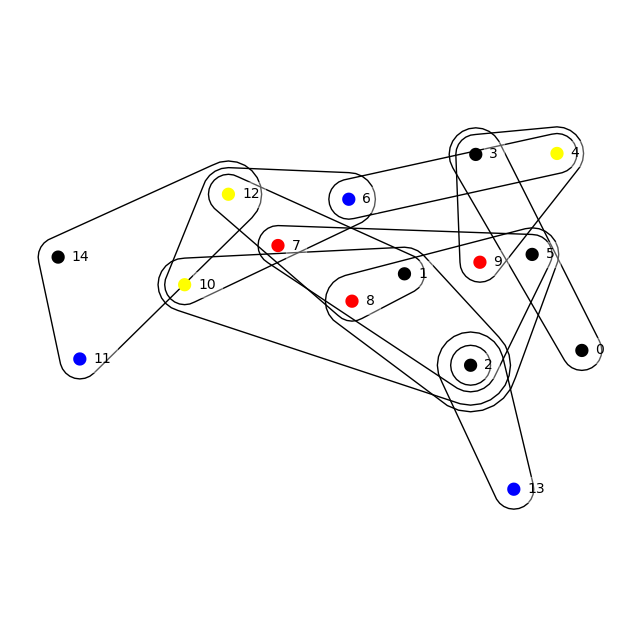

In [361]:
# Visualize
colors = []
for i in model.array:
    if i == 0:
        colors.append('red')
    elif i == 1:
        colors.append('blue')
    elif i == 2:
        colors.append('yellow')
    else:
        colors.append('black')
graph_x = hyperrd_to_hypernetx(model.graph)
hnx.drawing.draw(graph_x, 
                 with_edge_labels = False, 
                 layout_kwargs = {'seed': 39}, edges_kwargs={
     'edgecolors': 'black'
    },
                 nodes_kwargs={
     'facecolors': colors
    })

In [362]:
# Run the simulation
model.running(100, 0.2)

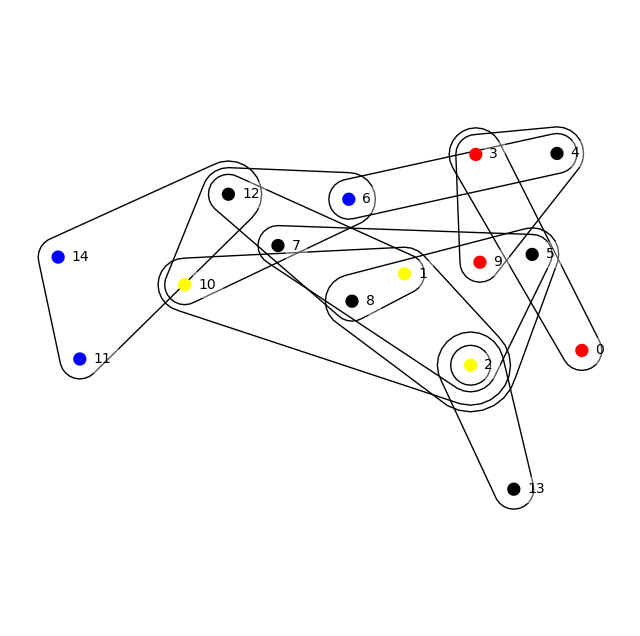

In [363]:
# Visualize
colors = []
for i in model.array:
    if i == 0:
        colors.append('red')
    elif i == 1:
        colors.append('blue')
    elif i == 2:
        colors.append('yellow')
    else:
        colors.append('black')
graph_x = hyperrd_to_hypernetx(model.graph)
hnx.drawing.draw(graph_x, 
                 with_edge_labels = False, 
                 layout_kwargs = {'seed': 39}, edges_kwargs={
     'edgecolors': 'black'
    },
                 nodes_kwargs={
     'facecolors': colors
    })

In [373]:
graph = k_uniform(15, 3, 0.02)
model = Schelling_Model(3, 3, 3, graph)
model.array

array([ 2., -1.,  1.,  0.,  1., -1.,  1., -1.,  2.,  0., -1.,  2., -1.,
        0., -1.])

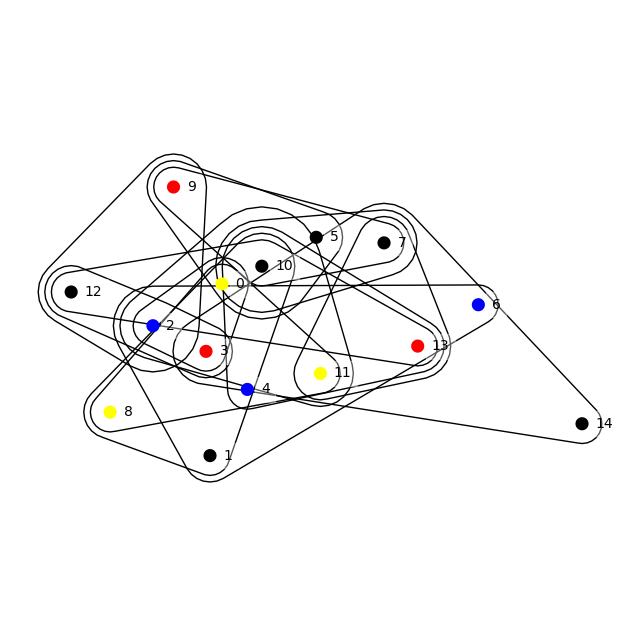

In [374]:
colors = []
for i in model.array:
    if i == 0:
        colors.append('red')
    elif i == 1:
        colors.append('blue')
    elif i == 2:
        colors.append('yellow')
    else:
        colors.append('black')
graph_x = hyperrd_to_hypernetx(model.graph)
hnx.drawing.draw(graph_x, 
                 with_edge_labels = False, 
                 layout_kwargs = {'seed': 39}, edges_kwargs={
     'edgecolors': 'black'
    },
                 nodes_kwargs={
     'facecolors': colors
    })

In [380]:
model.running(100, 0.4)

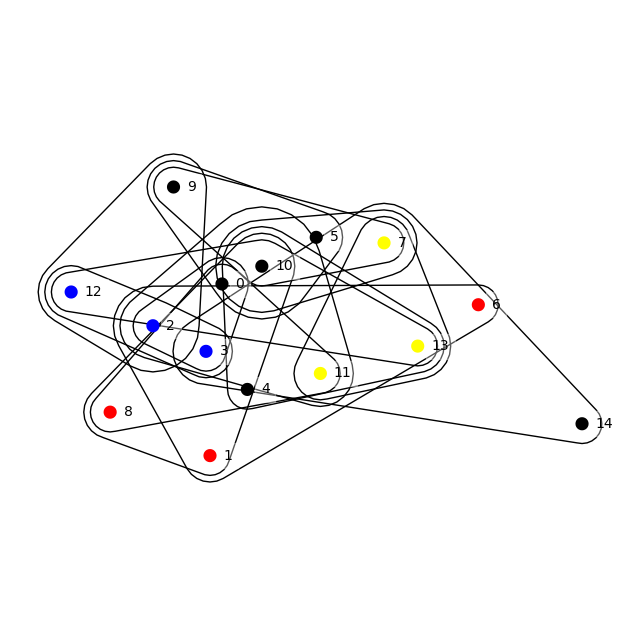

In [381]:
colors = []
for i in model.array:
    if i == 0:
        colors.append('red')
    elif i == 1:
        colors.append('blue')
    elif i == 2:
        colors.append('yellow')
    else:
        colors.append('black')
graph_x = hyperrd_to_hypernetx(model.graph)
hnx.drawing.draw(graph_x, 
                 with_edge_labels = False, 
                 layout_kwargs = {'seed': 39}, edges_kwargs={
     'edgecolors': 'black'
    },
                 nodes_kwargs={
     'facecolors': colors
    })